<a href="https://colab.research.google.com/github/SrNach/ADA-Informes/blob/main/Informe_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Informe Semana 2**
Algoritmo: MergeSort  
Autor: Ignacio Silva


# Descripción del Problema
**Problema: Ordenamiento de una secuencia de números**.  
**Entrada:** Una secuencia de números $[a_1, a_2, ..., a_n]$.  
**Salida:** Una secuencia con los mismos números que los de la entrada $[a'_1, a'_2, ..., a'_n]$, pero ordenados lógicamente, de menor a mayor, cumpliendo $a'_1 \leq a'_2  ... \leq a'_n$.

Un problema que se ha presentado durante años, y que actualmente existen una cantidad extensa de opciones con las que resolver esta problemática. En este informe se verá una de los muchos algoritmos de ordenamiento que existen.


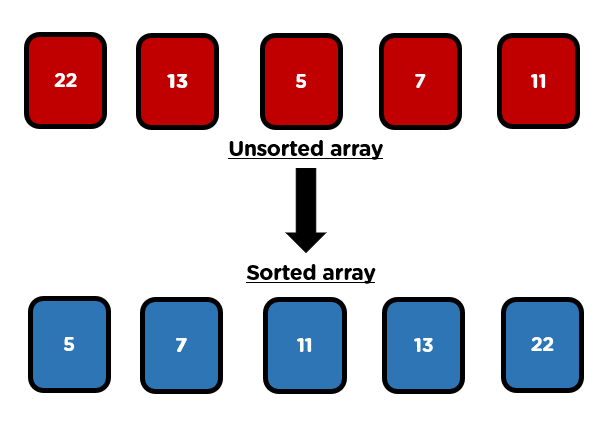

# Descripción del Algoritmo
El algoritmo MergeSort recibe un arreglo con una secuencia de $n$ elementos, donde el objetivo es ordenarlos de forma muy peculiar.

El funcionamiento de este algoritmo se basa en la famosa frase _divide y vencerás_, de esta manera el problema es más abordable y estable, a causa de que siempre tiene el mismo tiempo de ejecución.

1. El primer paso es separar el arreglo de largo $n$, consiguiendo $n$ arreglos de largo 1.
2. Luego se van juntando y ordenando poco a poco los arreglos, de tal manera que se van consiguiendo arreglos un poco más largos y ordenados.
3. Como resultado se obtiene un arreglo de largo $n$ ordenado.

###**Ejemplo paso a paso**

Como entrada se obtiene el arreglo $[16, 27, 8, 67]$, donde el objetivo es ordenar de menor a mayor esta secuencia de números.

Empieza dividiendo hasta obtener los arreglos de largo $1$, se consiguen los arreglos $[16], [27], [8], [67]$. 

**Primer Merge:**  
Se toman los arreglos $[16]$ y $[27]$, verificando cuál es menor, resultando en agregar a un nuevo arreglo el número $16$, como no quedan más comparaciones, se agregan los datos restantes en orden.  
**Resultado:**  $[16, 27]$

**Segundo Merge:**  
Los siguientes son $[8]$ y $[67]$, donde se puede observar que el menor número es el $8$, y como no quedan más comparaciones, se insertan los restantes en orden.  
**Resultado:** $[8, 67]$

**Tercer Merge:**  
Cuando se van juntando los arreglos, se generan arreglos más largos, esta vez como entrada se obtienen los arreglos $[16, 27]$ y $[8, 67]$.  
Se deben ir comparando los menores números de cada arreglo, y entre el $16$ y el $8$, el menor es el número $8$, insertándolo en el nuevo arreglo.  
**Arreglo actual:** $[8]$   
Ahora se comparan los números $16$ y $67$, y entre esos dos, se agrega el número $16$.  
**Arreglo actual:** $[8, 16]$  
Seguidamente se compara entre el $27$ y el $67$, y como es posible observar, se insertará el número $27$.  
**Arreglo actual:** $[8, 16, 27]$  
Como último, ya no se pueden hacer más comparaciones, debido a que sólo queda el número $67$, agregándolo al nuevo arreglo.  
**Resultado:** $[8, 16, 27, 67]$


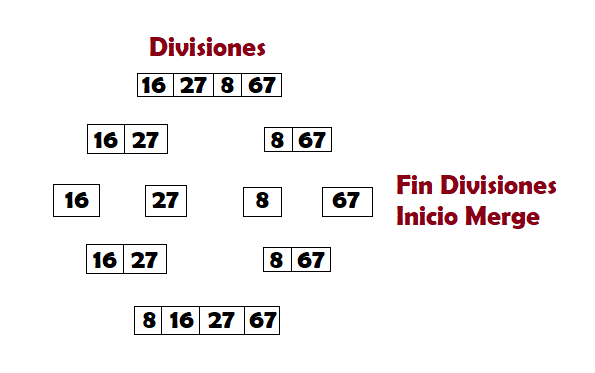  
`Imagen representativa`

#Implementación del Algoritmo
El algoritmo MergeSort será implementado de manera recursiva, de tal manera que se llamará a sí misma hasta dividirse por completo, las llamadas recursivas se terminarán hasta que los arreglos sean de largo 1.
Luego de esto se empezará a llamar a la función Merge.

###**Función Merge**  
Lo que hace la función Merge es tomar arreglos ordenados, e ir verificando de los dos arreglos, que datos son menores, para así agregarlos a un nuevo arreglo.


In [ ]:
#Librerias
import random
from termcolor import colored

In [ ]:
#Función MergeSort
def msort(A, verbose):
  if (len(A) > 1):
    mitad = len(A)//2

    left = A[:mitad] #subarreglo de izquierda
    right = A[mitad:] # subarreglo de derecha
      
    #Llamadas recursivas
    global llamadas

    llamadas += 1
    msort(left, verbose)
    llamadas += 1
    msort(right, verbose)
    

    #Correspondiente a función Merge
    i = j = k = 0

    ll = len(left) #largo left
    lr = len(right) #largo right

    global comp
    global pasadas

    if (verbose):
      print(colored(f"Pasada {pasadas}","green"))
      pasadas += 1
      print(colored("Arreglos a comparar:","blue"))
      print(left," y ",right)
      print(colored("Comparaciones:","blue"))

    while (i < ll and j < lr):
      
      if (verbose): print(colored(f"[{left[i]}] - [{right[j]}] -> ", "yellow"), end="")

      if (left[i] < right[j]):
        A[k] = left[i]
        i+=1
      else:
        A[k] = right[j]
        j+=1
      k+=1
      comp+=1
      if (verbose): mostrarA(A, k)
  
    if (verbose): print(colored("No más comparaciones", "blue"))

    while (i < ll):
      A[k] = left[i]
      i+=1
      k+=1
      comp += 1
      if (verbose): mostrarA(A, k)
    while (j < lr):
      A[k] = right[j]
      j+=1
      k+=1
      comp += 1
      if (verbose): mostrarA(A, k)
    
    if (verbose):
      print(colored("Resultado:","blue"))
      print(A,"\n")


In [ ]:
#Mostrar sub-arreglo
def mostrarA(A, k):
  print("[", end="")
  for i in range(0, k):
    if (i == 0):
      print(A[i], end="")
    else:
      print(",",A[i], end="")
  print("]")


In [ ]:
# Main
n = random.randint(4, 10) # largo random arreglo
A = random.sample(range(1, 100), n) # arreglo random
verbose = False
comp = 0
llamadas = 0
pasadas = 1

print(colored("Entrada:", "red"),A,"\n")
msort(A, verbose)
print(colored("Salida:", "red"),A)
if (verbose):
  print("Cantidad de comparaciones: ",comp,"\nTotal llamadas recursivas: ",llamadas)

Entrada: [46, 60, 51, 6, 98, 68, 5, 15] 

Salida: [5, 6, 15, 46, 51, 60, 68, 98]


###**Ejemplo con _verbose = True_**


In [ ]:
n = random.randint(4, 6) # largo random arreglo
A = random.sample(range(1, 100), 4) # arreglo random
verbose = True
comp = 0 # comparaciones
# aclaración: en este conteo se cuentan las tanto las comparaciones como las iteraciones de después de romper el primer ciclo while de Merge 

llamadas = 0 # llamadas recursivas
pasadas = 1

print(colored("Entrada:", "red"),A,"\n")
msort(A, verbose)
print(colored("Salida:", "red"),A)
if (verbose):
  print("Cantidad de comparaciones: ",comp,"\nTotal llamadas recursivas: ",llamadas)

Entrada: [85, 46, 43, 37] 

Pasada 1
Arreglos a comparar:
[85]  y  [46]
Comparaciones:
[85] - [46] -> [46]
No más comparaciones
[46, 85]
Resultado:
[46, 85] 

Pasada 2
Arreglos a comparar:
[43]  y  [37]
Comparaciones:
[43] - [37] -> [37]
No más comparaciones
[37, 43]
Resultado:
[37, 43] 

Pasada 3
Arreglos a comparar:
[46, 85]  y  [37, 43]
Comparaciones:
[46] - [37] -> [37]
[46] - [43] -> [37, 43]
No más comparaciones
[37, 43, 46]
[37, 43, 46, 85]
Resultado:
[37, 43, 46, 85] 

Salida: [37, 43, 46, 85]
Cantidad de comparaciones:  8 
Total llamadas recursivas:  6


#Propiedades del Algoritmo

###**Tiempo de ejecución**
El algoritmo MergeSort tiene una peculiar característica, y es que no importa de que caso hablemos, siempre tendrá el mismo tiempo de ejecución, esto es debido a que no importa en que estado se encuentre el arreglo, siempre hará lo mismo.

**Comprobación**  

Considerando un arreglo de largo $n$ y al utilizar las complejidades $O(1)$ como $c$, podemos observar que si este arreglo se subdivide constantemente, los tamaños van variando entre $n$, $n/2$, $n/4$, hasta obtener $n$ arreglos de largo $1$.  
Si analizamos profundamente el árbol, podemos darnos cuenta que cada nivel tiene tiempo de ejecución $cn$, y si lo estudiamos matemáticamente, nos percatamos que el árbol tiene altura $log_2(n)$, por consiguiente, la suma de todos los niveles es $cn \cdot log_2(n)$, demostrando que el tiempo de ejecución del algoritmo es de $O(n \cdot logn)$.  

**Cota asintótica:** $\Theta(n \cdot logn)$


![image](https://cdn.kastatic.org/ka-perseus-images/5fcbebf66560d8fc490de2a0d8a0e5b1d65c5c54.png)  
`Árbol Recursivo`

**Ventajas:**  Este algoritmo tiene un tiempo de ejecución muy estable y seguro, ya que nunca se tomará demasiado tiempo en los peores casos posibles.  
**Desventajas:**  MergeSort no es capaz de comprobar en que estado se encuentra el arreglo de entrada, por que si le pasamos un arreglo ya ordenado, se hará el mismo procedimiento, y será una pérdida de tiempo y recursos.


###**Prueba de Correctitud**
Se comprobará si el algoritmo MergeSort funciona correctamente, ordenando las secuencias de números que le entreguemos.  

#####**Propiedad invariante de bucle (Merge)**  
Esta propiedad consiste en que si los dos arreglos de entrada ya se encuentran ordenados, al utilizar la función Merge, resultará en la unión ordenada de los dos arreglos.

- **Inicialización:**  La primera vez que se llama a esta función, se le entregan dos arreglos de largo $1$, esto quiere decir que como sólo tienen un elemento, ya de por sí están ordenados.

- **Mantención:**  Al usar el Merge entre dos arreglos ordenados (Entrada), lo que ocurre es que se comprueba entre los primeros elementos de los arreglos para ver cuáles son los menores, y se va generando un arreglo ordenado compuesto por la unión de los dos de entrada (Tal como se vió en el ejemplo paso a paso con verbose = True).

Teniendo en cuenta la propiedad anterior, y si lo pensamos lógicamente cada vez que se llame a la función Merge, el resultado va a ser un arreglo ordenado.

#####**Inducción**
Para probar la correctitud de algoritmos recursivos usaremos inducción matemática.  
En inducción matemática, para probar una declaración $P(n)$, para todos los números naturales $n$, típicamente debemos:

- Probar $P(n)$ para un **caso base**, por ejemplo $P(1)$
- Probar que si $P(m)$ es cierto para $m < n$, entonces $P(n)$ también lo es.

**$P(1)$:** Este caso es verdadero, debido a que si se le entrega un arreglo de largo $1$, lo devolverá ordenado, ya que contiene un sólo elemento.

**$P(m)$:** Se conoce de que el arreglo se va subdividiendo en dos (Como se mostró anteriormente con el árbol de recursión), lo que provoca que si se tiene un arreglo de largo $n$, se subdivide en dos arreglos de largo $m = [n/2]$ y $m = [n/2]$ y son ordenadas con MergeSort (Demostrado por la propiedad invariante de bucle de función Merge).  
Con lo anterior, se demuestra que el algoritmo MergeSort, ordena exitosamente un arreglo de largo $n$ de menor a mayor.

#Análisis y Experimentos


In [ ]:
# Librerias a usar
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import math
import numpy as np

###**Competitividad de Algoritmo**
Comprobaremos si vale la pena elegir el MergeSort sobre otros algoritmos en base a su eficacia y rapidez, esta vez lo haremos con el algoritmo InsertionSort.

A continuación se encuentra el código de InsertionSort con el que se trabajará.



In [ ]:
def insertionSort(array):
  n = len(array)
  global compI

  for i in range (1, n):
    num = array[i]
    j = i-1
    while (j >= 0 and num < array[j]):
      array[j+1] = array[j]
      j -= 1
      compI += 1
    array[j+1] = num

####Tiempo de Ejecución 
Se comparará la velocidad de ejecución.  
Trabajaremos con arreglos de largo $n \in [5, 500]$, compuesto por elementos $\in [1, 1000]$.


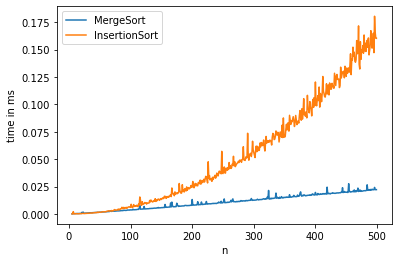

In [ ]:
x=[]; y=[]; y2=[]

for n in range(5,500):

  a = random.sample(range(1, 1000), n)

  #la función repeat está ejecutando 20 veces InsertionSort con el arreglo a y retorna el mejor tiepo obtenido.
  t2 = repeat(setup="from __main__ import insertionSort", stmt=f"insertionSort({a})", repeat=1, number=10)
  t = repeat(setup="from __main__ import msort", stmt=f"msort({a}, {False})", repeat = 1, number = 10)

  x.append(n)
  y.append(t)
  y2.append(t2)


plt.plot(x,y)
plt.plot(x, y2)
plt.legend(["MergeSort", "InsertionSort"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

**Análisis de Resultados**  
Tal y como se ve en el gráfico, el algoritmo MergeSort toma menos tiempo al ejecutarse, debido a que su tiempo de ejecución tiene un comportamiento casi lineal, es decir, su tiempo de ejecución no crece tanto como InsertionSort, que su tiempo de ejecución en el caso promedio es $O(n^2)$.

####Cantidad de Comparaciones  
Observaremos la diferencia entre la cantidad de comparaciones durante su ejecución entre los algoritmos MergeSort y InsertionSort.  
Trabajaremos con arreglos de largo $n \in [5, 500]$, compuesto por elementos $\in [1, 1000]$.


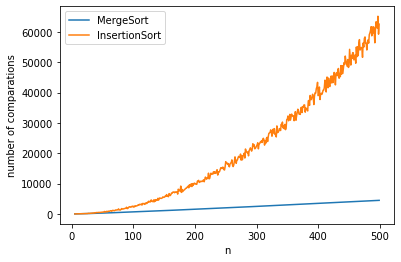

In [ ]:
x=[n for n in range(5,500)] 
y=[]; y2=[];

for n in range(5,500):
  compI = 0
  comp = 0
  a = random.sample(range(1, 1000), n)
  b = np.copy(a)
  msort(a, False)
  insertionSort(b)

  y.append(comp)
  y2.append(compI)

plt.plot(x,y)
plt.plot(x,y2)
plt.legend(["MergeSort", "InsertionSort"])

plt.xlabel('n')
plt.ylabel('number of comparations')
plt.show()

**Análisis de Resultados**  
Similar al análisis anterior, se observa que la diferencia radica en la complejidad del algoritmo. La de InsertionSort es $O(n^2)$ en el caso promedio, el cuál crece en mayor medida.

###**Cantidad de Comparaciones (Experimental)**
Para probar si la práctica coincide con la teoría, a continuación se graficará:
- La cantidad de comparaciones calculadas matemáticamente del mejor y peor caso posible.
- La cantidad de comparaciones en casos experimentales con arreglos aleatorios.  

Se usarán arreglos de largo $n$, con $n \in [5, 20]$, compuesto por números $\in [1, 100]$.  
Como el mejor y peor caso son el mismo, se representarán en una sola función.

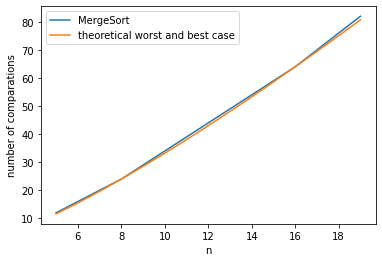

In [ ]:
x=[n for n in range(5,20)] 
y1=[n*math.log2(n) for n in range(5,20)] # worst and best case
y=[]; 

for n in range(5,20):
  comp = 0
  a = random.sample(range(1, 100), n)
  msort(a, False)
  y.append(comp)

plt.plot(x,y)
plt.plot(x,y1)
plt.legend(["MergeSort", "theoretical worst and best case"])

plt.xlabel('n')
plt.ylabel('number of comparations')
plt.show()

**Análisis de Resultados**  
Ya conocemos que la complejidad de MergeSort es $O(n \cdot logn)$, y esto se cumple tanto en su mejor y peor caso, y esto se cumple siempre, es decir, que en la práctica también se cumple esto, es por esta razón por la que los dos gráficos se ven iguales.